# Sales Analysis : Global Skincare & Beauty E-Commerce

Proyek ini bertujuan untuk menganalisis performa penjualan produk skincare dan kecantikan pada platform e-commerce. Analisis dilakukan menggunakan Python untuk eksplorasi dan visualisasi data, serta Tableau untuk membuat dashboard interaktif. Proyek ini diharapkan memberikan insight terkait tren penjualan, dan performa produk. Dataset yang digunakan merupakan data publik dari situs Kaggle, sehingga hasil analisis bersifat eksperimental dan digunakan untuk tujuan pembelajaran serta portofolio.

## Latar Belakang

Dalam dunia e-commerce yang kompetitif, perusahaan perlu memahami data transaksi penjualan mereka untuk mengambil keputusan strategis. Dengan menganalisis data penjualan perusahaan dapat menentukan produk yang paling laris, saluran pemasaran terbaik, serta memaksimalkan keuntungan. Oleh karena itu, analisis ini penting untuk membantu manajemen meningkatkan strategi pemasaran dan pengelolaan inventaris.

## Pertanyaan Bisnis

**📊 Analisis Penjualan**
* Bagaimana tren penjualan dan profit bulanan sepanjang tahun?
* Produk atau kategori apa yang memiliki penjualan tertinggi?

**📦 Kinerja Produk**
* Produk mana yang paling sering dipesan tetapi memiliki margin keuntungan rendah?

**🧑‍🤝‍🧑 Segmentasi Pelanggan**
* Apakah pelanggan dari segmen tertentu memberikan profit yang lebih besar dibanding yang lain?

**🏷️ Diskon dan Profitabilitas**
* Apa dampak pemberian diskon terhadap profit?
* Apakah ada korelasi negatif antara diskon tinggi dan penurunan profit?

**🌍 Analisis Geografi**
* Bagaimana distribusi penjualan berdasarkan negara, region, atau market?
* Wilyah mana yang memiliki potensi pasar terbesar untuk dikembangkan?

## Deskripsi Dataset

Nama Dataset : ``Global skincare and Beauty e-store_E-commerce Analysis_English.xlsx``

Sumber : Kaggle

Jumlah data/baris : 51.291 baris

## Data Wrangling

### Gathering Data

Pada tahapan awal kita perlu mengimport dataset yang akan dianalisis terlabih dahulu menggunakan library `pandas`.

In [1]:
# import library
import pandas as pd
import numpy as np

# load Dataset
df = pd.read_excel('Global skincare and Beauty E-commerce.xlsx', sheet_name='data')
df.head(3)

,Row ID,Order ID,Order Date,Customer ID,Segment,City,State,Country,Country latitude,Country longitude,Region,Market,Subcategory,Category,Product,Quantity,Sales,Discount,Profit
0,46682,IZ-2012-LW699061-40911,2020-01-03,LW-699061,Corporate,Mosul,Ninawa,Iraq,33.223191,43.679291,Western Asia,Asia Pacific,"bath oils, bubbles and soaks",Body care,Head & Shoulders Classic Clean Shampoo,20,600,0.0,300.0
1,10124,US-2012-BT1130518-40912,2020-01-04,BT-1130518,Self-Employed,Pilar,Alagoas,Brazil,-14.235004,-51.925280,South America,LATAM,"bath oils, bubbles and soaks",Body care,Kiehl's Ultra Facial Overnight Hydrating Masque,2,40,0.6,-4.0
2,9067,MX-2012-AW1093031-40912,2020-01-04,AW-1093031,Self-Employed,Santiago de Cuba,Santiago de Cuba,Cuba,21.521757,-77.781167,Caribbean,LATAM,"bath oils, bubbles and soaks",Body care,Golden Vine Bracelet,1,151,0.0,75.5


In [2]:
df.shape

(51290, 19)

Data yang akan di analisis memiliki 19 kolom serta 51.290 baris atau record

### Assesing Data

Pada tahapan assesing data dilakuan beberapa penilaian atau pengecekan seperti data duplikat, data yang hilang, dan kesalahan tipe data. pengecekan dilakuan bertujuan agar mengetahui apa saja yang perlu diperbaiki atau dibersihkan di tahap data cleaning.

In [3]:
# Check Data Duplikat
print(f'Data Duplikat : {df.duplicated().sum()}\n')

# Check missing value
print(f'Missing Value : \n{df.isna().sum()}')

Data Duplikat : 0

Missing Value : 
Row ID               0
Order ID             0
Order Date           0
Customer ID          0
Segment              0
City                 0
State                0
Country              0
Country latitude     0
Country longitude    0
Region               0
Market               0
Subcategory          0
Category             0
Product              0
Quantity             0
Sales                0
Discount             0
Profit               0
dtype: int64


Dataset tidak menunjukan adanya data duplikat maupun missing value

In [4]:
# Cek Tipe Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Row ID             51290 non-null  int64         
 1   Order ID           51290 non-null  object        
 2   Order Date         51290 non-null  datetime64[ns]
 3   Customer ID        51290 non-null  object        
 4   Segment            51290 non-null  object        
 5   City               51290 non-null  object        
 6   State              51290 non-null  object        
 7   Country            51290 non-null  object        
 8   Country latitude   51290 non-null  float64       
 9   Country longitude  51290 non-null  float64       
 10  Region             51290 non-null  object        
 11  Market             51290 non-null  object        
 12  Subcategory        51290 non-null  object        
 13  Category           51290 non-null  object        
 14  Produc

Begitupun juga dengan tipe data untuk tiap kolomnya sudah sesuai dengan semestinya, namun dalam informasi di atas terlihat bahwa beberapa nama kolom memiliki pemisah spasi yang perlu diganti.


### Cleaning Data

Tidak banyak yang dilakukan dalam tahap cleaning hanya mengganti spasi dengan karakter underscore pada beberapa kolom yang memiliki dua kata sebagai pemisahnya agar sesuai dengan kaidah yang berlaku.

In [5]:
# Menambahkan Underscore '_' pada kolom yang memiliki dua kata
df.columns = df.columns.str.replace(' ','_')
df.columns

Index(['Row_ID', 'Order_ID', 'Order_Date', 'Customer_ID', 'Segment', 'City',
       'State', 'Country', 'Country_latitude', 'Country_longitude', 'Region',
       'Market', 'Subcategory', 'Category', 'Product', 'Quantity', 'Sales',
       'Discount', 'Profit'],
      dtype='object')

dataset kini memiliki format nama kolom yang sudah sesuai

## Exploratory Data Analysis

In [6]:
df.describe()

,Row_ID,Order_Date,Country_latitude,Country_longitude,Quantity,Sales,Discount,Profit
count,51290.00000,51290,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,2022-05-11 21:26:49.155780608,24.506298,-4.585665,5.415832,127.074946,0.142908,20.772346
min,1.00000,2020-01-01 00:00:00,-40.900557,-106.346771,1.000000,2.000000,0.000000,-1746.000000
25%,12823.25000,2021-06-19 00:00:00,12.879721,-95.712891,2.000000,25.000000,0.000000,0.000000
50%,25645.50000,2022-07-08 00:00:00,35.861660,2.213749,4.000000,56.000000,0.000000,7.200000
75%,38467.75000,2023-05-22 00:00:00,38.963745,43.679291,7.000000,132.000000,0.200000,25.000000
max,51290.00000,2023-12-31 00:00:00,61.924110,174.885971,20.000000,3940.000000,0.850000,1820.000000
std,14806.29199,NaN,24.119393,80.298692,4.908234,236.074764,0.212280,83.582680


diketahui bahwa dataset menunjukan data transaksi dari bulan januari 2020 hingga Desember 2023 (4 tahun) dengan penjualan terbesar berada di angka `$3940` sedangkan terkcilnya berada di angka `$2`, untuk jumlah pembelian terbanyak adalah 20 dan pembelian terkcilnya yaitu 1 pcs discount terbesar yang pernah diberikan adalah 85%. selain itu toko pernah mencatatakn profit terbesarnya di angka `$1820` dan pernah mencatatkan profit minus di angka `-$1746`.

### 📊 Analisis Penjualan

#### Tren penjualan dan profit bulanan sepanjang tahun

untuk melihat tren penjualan dan profit dilakuakn beberapa analisis seperti berdasarkan tahunan, berdasarkan bulan, dan berdasarkan bulan untuk tiap tahun nya. Hal yang pertama dilakuan adalah dengan mengelompokan kolom tanggal menggunakan metode `Groupby()`.

In [7]:
# Tren Penjualan Tahunan (Yearly)
import datetime as dt

penjualan_tahunan = df.groupby(df['Order_Date'].dt.year).agg(
    total_sales=('Sales','sum'),
    avg_sales=('Sales','mean'),
    total_profit=('Profit','sum'),
    avg_profit=('Profit','mean')
).reset_index()

penjualan_tahunan.rename(columns={'Order_Date':'Tahun'}, inplace=True)
penjualan_tahunan

,Tahun,total_sales,avg_sales,total_profit,avg_profit
0,2020,1148361,127.624028,207116.122,23.018018
1,2021,1405876,128.249954,259696.964,23.690655
2,2022,1770790,128.327415,318671.888,23.093839
3,2023,2192647,125.072557,279928.676,15.967639


In [8]:
# Penjualan Bulanan
penjualan_bulanan = df.groupby(df['Order_Date'].dt.month).agg(
    total_sales=('Sales','sum'),
    avg_sales=('Sales','mean'),
    total_profit=('Profit','sum'),
    avg_profit=('Profit','mean')
).reset_index()

penjualan_bulanan['Order_Date'] = pd.to_datetime(penjualan_bulanan['Order_Date'], format='%m').dt.strftime('%B')
penjualan_bulanan.rename(columns={'Order_Date':'Bulan'}, inplace=True)
penjualan_bulanan

,Bulan,total_sales,avg_sales,total_profit,avg_profit
0,January,330957,126.754883,52765.056,20.208754
1,February,282882,128.058850,40988.706,18.555322
2,March,377230,125.450615,65249.640,21.699248
3,April,375339,123.792546,62592.082,20.643827
4,May,466099,123.078690,76629.962,20.235004
5,June,698130,131.672954,122870.050,23.174283
6,July,434998,136.149609,63180.232,19.774721
7,August,648375,128.010859,112232.088,22.158359
8,September,711583,119.433199,123143.150,20.668538
9,October,565705,124.167032,86672.644,19.023846


In [9]:
# Penjualan bulanan pertahun
def pertahun(data,tahun):
    filtered = data[data['Order_Date'].dt.year == tahun]
    bulan = filtered.groupby(filtered['Order_Date'].dt.month).agg({'Sales':'sum','Profit':'sum'}).reset_index()
    
    bulan['Order_Date'] = pd.to_datetime(bulan['Order_Date'], format='%m').dt.strftime('%B')
    bulan.rename(columns={'Order_Date':'Bulan','Sales':f'Sales_{tahun}','Profit':f'Profit_{tahun}'}, inplace=True)
    return bulan

In [10]:
df_2020 = pertahun(df,2020) # tahun 2020
df_2021 = pertahun(df,2021) # tahun 2021
df_2022 = pertahun(df,2022) # tahun 2022
df_2023 = pertahun(df,2023) # tahun 2023

bulanan_pertahun = df_2020.merge(df_2021, on='Bulan').merge(df_2022, on='Bulan').merge(df_2023, on='Bulan')
bulanan_pertahun

,Bulan,Sales_2020,Profit_2020,Sales_2021,Profit_2021,Sales_2022,Profit_2022,Sales_2023,Profit_2023
0,January,50460,10290.496,74529,12886.440,86655,16954.562,119313,12633.558
1,February,49815,8443.904,49208,8331.202,79783,13584.172,104076,10629.428
2,March,62773,13435.526,81417,14876.648,94546,18427.400,138494,18510.066
3,April,68707,11588.646,84161,14270.992,96929,19734.846,125542,16997.598
4,May,73493,14027.566,107846,20078.220,133046,25142.154,151714,17382.022
5,June,122286,21809.286,146069,27035.938,196437,41810.492,233338,32214.334
6,July,70993,10656.056,91802,10577.512,139468,23586.330,132735,18360.334
7,August,105207,20400.210,132955,27624.578,201755,29948.416,208458,34258.884
8,September,133633,25514.566,144343,27407.070,193930,37867.796,239677,32353.718
9,October,107889,17647.262,117300,23336.676,142247,23680.532,198269,22008.174


#### Produk atau kategori apa yang memiliki penjualan tertinggi?

untuk mecari produk atau ketegori berdasrkan penjualanny maka dilakuakn metode groupby terhadap produk dan melakuan fungsi aggregasi terhadap penjualan

In [11]:
# Produk terlaris
df_product = df.groupby('Product')['Sales'].sum().sort_values(ascending=False).reset_index().head(10)
df_product

,Product,Sales
0,Herbal Essences Bio,67640
1,Rose Gold Petal Studs,29987
2,Sterling Wave Earrings,29520
3,Golden Blaze Necklace,28564
4,Sterling Solstice Anklet,28552
5,Gold Spectrum Anklet,27004
6,Sterling Frost Ring,26772
7,Silver Mirage Necklace,26226
8,Silver Glimmer Necklace,25088
9,Sterling Whisper Bracelet,24883


In [12]:
# category produk terlaris
df_cat_product = df.groupby('Category')['Sales'].sum().sort_values(ascending=False).reset_index().head(10)
df_cat_product

,Category,Sales
0,Body care,2682942
1,Home and Accessories,1245643
2,Make up,1121222
3,Hair care,1022151
4,Face care,445716


### 📦 Kinerja Produk

#### Produk mana yang paling sering dipesan tetapi memiliki margin keuntungan rendah?


In [13]:
# Poroduk Terlaris
produk_df = df.copy()
produk_df['profit_margin'] = produk_df['Profit'] / produk_df['Sales']

product_summary = produk_df.groupby('Product').agg({
    'Order_ID':'nunique',
    'Quantity':'sum',
    'Sales':'sum',
    'Profit':'sum',
    'profit_margin':'mean'
}).reset_index()

product_summary['total_profit_margin'] = product_summary['Profit'] / product_summary['Sales']

avg_quantity = product_summary['Quantity'].mean()
avg_margin = product_summary['total_profit_margin'].mean()

low_margin_freq_products = product_summary[(product_summary['Quantity'] > avg_quantity) & (product_summary['total_profit_margin'] < avg_margin)].sort_values(by='Quantity', ascending=False)

low_margin_freq_products[['Product','Quantity','total_profit_margin']].head(10)

,Product,Quantity,total_profit_margin
1335,Herbal Essences Bio,1780,0.134383
3208,TRESemmé Moisture Rich Conditioner,455,0.145508
2807,Revlon Nail Enamel Rich Raspberry Berry Pink,438,0.149932
656,Clinique Moisture Surge Overnight Mask,371,0.156577
463,CeraVe Therapeutic Hand Cream,368,0.145870
2999,Sigma Beauty E40 Tapered Blending Brush,356,0.161152
3380,Urban Decay Eyeshadow Half Baked Golden Bronze,327,0.114697
2093,Maybelline Color Tattoo 24HR Eyeshadow Tough a...,326,0.162454
428,CeraVe Healing Ointment,306,0.084510
1689,L'Oréal Paris Colour Riche Nail Color Grecian ...,298,0.084060


### 🧑‍🤝‍🧑 Segmentasi Pelanggan

#### Apakah pelanggan dari segmen tertentu memberikan profit yang lebih besar dibanding yang lain?

In [14]:
# Segmentasi Pelanggan
df_segment = df.groupby('Segment').agg(
    total_sales=('Sales','sum'),
    total_profit=('Profit','sum'),
    total_order=('Order_ID','count')
).reset_index()
df_segment['persentase'] = df_segment['total_order'].apply(lambda x : (x / (df_segment['total_order'].sum())) * 100)
df_segment

,Segment,total_sales,total_profit,total_order,persentase
0,Consumer,2146780,365377.602,26518,51.702086
1,Corporate,3840707,608523.326,15429,30.081887
2,Self-Employed,530187,91512.722,9343,18.216027


### 🏷️ Diskon dan Profitabilitas

#### Apa dampak pemberian diskon terhadap profit?

In [15]:
# Diskon dan Profitablitas
discount_to_profit = df.groupby('Discount').agg(
    total_profit=('Profit','sum'),
    avg_profit=('Profit','mean')
).reset_index()

discount_to_profit.sort_values(by='total_profit', ascending=False)

,Discount,total_profit,avg_profit
0,0.000,1135322.550,39.136908
3,0.100,109958.500,27.030113
7,0.200,77694.150,15.545048
6,0.170,12733.420,17.324381
1,0.002,6595.008,14.305874
10,0.270,5640.940,14.538505
4,0.150,4807.250,10.473312
2,0.070,3492.270,23.281800
5,0.150,3369.500,41.091463
9,0.250,1361.350,6.875505


#### Apakah ada korelasi negatif antara diskon tinggi dan penurunan profit?

In [16]:
from scipy.stats import pearsonr

corr, p_value = pearsonr(df['Discount'],df['Profit'])
print(f'correlation: {corr:.3f} P-Value: {p_value:3f}')

correlation: -0.317 P-Value: 0.000000


### 🌍 Analisis Geografi

#### Bagaimana distribusi penjualan berdasarkan negara, region, atau market?

In [17]:
# Fungsi Untuk Mengetahui penjualan wilayah
def sales_distribution(data,by):
    if by == 'Country':
        sales_by_country = data.groupby(by).agg({'Quantity':'sum'}).sort_values(by='Quantity', ascending=False).reset_index()
        return sales_by_country
    elif by == 'Region':
        sales_by_region = data.groupby(by).agg({'Quantity':'sum'}).sort_values(by='Quantity', ascending=False).reset_index()
        return sales_by_region
    elif by == 'Market':
        sales_by_market = data.groupby(by).agg({'Quantity':'sum'}).sort_values(by='Quantity', ascending=False).reset_index()
        return sales_by_market

In [18]:
sales_distribution(df,'Country')

,Country,Quantity
0,United States,55950
1,France,15969
2,Australia,15937
3,Mexico,14856
4,Germany,11457
...,...,...
159,Equatorial Guinea,3
160,Oman,3
161,Suriname,3
162,Luxembourg,2


In [19]:
sales_distribution(df,'Region')

,Region,Quantity
0,Western Europe,32844
1,Central America,30967
2,Oceania,19356
3,Western US,18049
4,Southeastern Asia,17477
5,South America,16125
6,Eastern US,15888
7,Southern Asia,14466
8,Eastern Asia,13245
9,Central US,12777


In [20]:
sales_distribution(df,'Market')

,Market,Quantity
0,Asia Pacific,77628
1,Europe,64656
2,USCA,57709
3,LATAM,56349
4,Africa,21436


#### Wilyah mana yang memiliki potensi pasar terbesar untuk dikembangkan?

In [21]:
# Potensial Wilayah
region_year = df.groupby(['Region',df['Order_Date'].dt.year]).agg({
    'Sales':'sum',
    'Profit':'sum',
    'Order_ID':'nunique'
}).reset_index()

region_year['profit_margin'] = region_year['Profit'] / region_year['Sales']

# pertumbuhan penjualan
region_year['sales_growth'] = region_year.groupby('Region')['Sales'].pct_change()
# pertumbuhan order
region_year['order_growth'] = region_year.groupby('Region')['Order_ID'].pct_change()

latest_year = region_year['Order_Date'].max()
latest_data = region_year[region_year['Order_Date'] == latest_year]

avg_margin = latest_data['profit_margin'].mean()

potential_region = latest_data[(latest_data['Sales'] < latest_data['Sales'].max()) &
    (latest_data['sales_growth'] > 0) &
    (latest_data['order_growth'] > 0) &
    (latest_data['profit_margin'] > avg_margin)]

print('Wilayah dengan potensi pengembangan pasar'.center(100))
potential_region = potential_region.sort_values(by='sales_growth', ascending=False)
potential_region

                             Wilayah dengan potensi pengembangan pasar                              


,Region,Order_Date,Sales,Profit,Order_ID,profit_margin,sales_growth,order_growth
11,Central Africa,2023,25015,7137.050,117,0.285311,0.607854,0.392857
71,Southern Europe,2023,109219,21125.250,381,0.193421,0.547537,0.346290
35,Eastern Europe,2023,63881,17533.450,290,0.274470,0.468799,0.387560
3,Canada,2023,15745,4346.800,62,0.276075,0.193074,0.068966
91,Western US,2023,146856,25410.950,541,0.173033,0.189609,0.291169
67,Southern Asia,2023,103939,22283.600,461,0.214391,0.186762,0.259563
39,Eastern US,2023,119000,16243.050,471,0.136496,0.167651,0.262735
43,North Africa,2023,43042,12520.350,236,0.290887,0.164336,0.296703
15,Central America,2023,235423,36703.218,923,0.155903,0.157330,0.139506
7,Caribbean,2023,68279,9810.696,272,0.143685,0.041648,0.062500


## Data Visualization

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import ticker


#### Bagaimana tren penjualan dan profit bulanan sepanjang tahun?

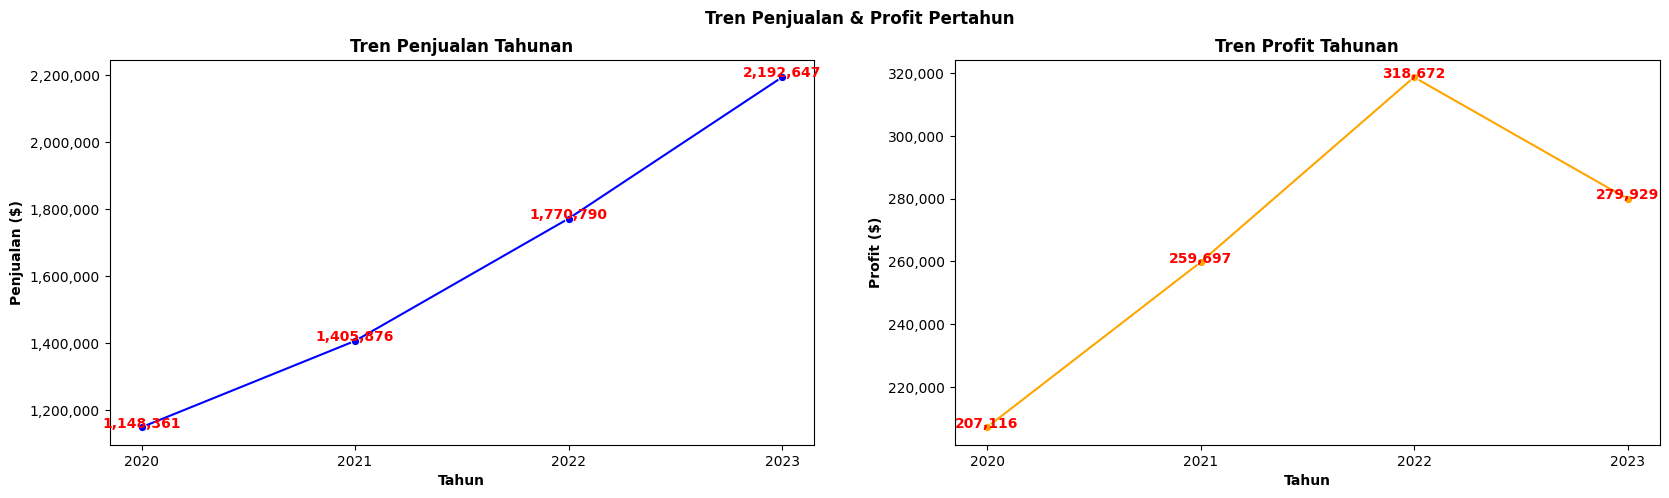

<Figure size 640x480 with 0 Axes>

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,5))

# Tren penjualan tahunan
sns.lineplot(data=penjualan_tahunan, x='Tahun' ,y='total_sales', ax=ax[0], marker='o', color='blue')
ax[0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _ : f'{x:,.0f}'))

for x, y in zip(penjualan_tahunan['Tahun'], penjualan_tahunan['total_sales']):
    ax[0].text(x,y, f'{y:,}', ha='center', fontweight='bold', color='red')
    
ax[0].set_title('Tren Penjualan Tahunan', fontweight='bold')
ax[0].set_xlabel('Tahun', fontweight='bold')
ax[0].set_ylabel('Penjualan ($)', fontweight='bold')
ax[0].set_xticks(penjualan_tahunan['Tahun'].unique())

# Tren profit tahunan
sns.lineplot(data=penjualan_tahunan, x='Tahun', y='total_profit', ax=ax[1], marker='o', color='orange')
ax[1].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _ : f'{x:,.0f}'))

for x, y in zip(penjualan_tahunan['Tahun'], penjualan_tahunan['total_profit']):
    ax[1].text(x,y , f'{y:,.0f}', ha='center', fontweight='bold', color='red')
    
ax[1].set_title('Tren Profit Tahunan', fontweight='bold')
ax[1].set_xlabel('Tahun', fontweight='bold')
ax[1].set_ylabel('Profit ($)', fontweight='bold')
ax[1].set_xticks(penjualan_tahunan['Tahun'].unique())

plt.suptitle('Tren Penjualan & Profit Pertahun', fontweight='bold')
plt.show()
plt.tight_layout()


berdasarkan grafik penjualan tahunan di atas terlihat bahwa Tren penjulaan atau revenue yang dihasilkan selama 3 tahun dari tahun 2020 - 2023 terlihat mengalami peningkatan yang konsisten dan signifikan dimana pada tahun terakhir penjualan diperoleh total penjualan senilai `$2.192.647` itu menunjukan bahwa bisnis penjualan skincare dan kecantikan ini cukup berkembang dari nilai penjualan. Sedangkan untuk profit yang dihasilkan terlihat bahwa profit sempat mengalmi kenaikan yang sejalan dengan penjualan selama 2 tahun dari tahun 2020 hingga 2022 namun pada tahun terakhir tahun 2023 mengalami penurunan. oleh karena itu perlu dianalisis lebih dalam penyebab penurunan profit tersebut apakah ada kaitannya dengan produk yang dijual ataupun ada hubungannya dengan pemberian diskon yang dilakuakn pada tahun tersebut.

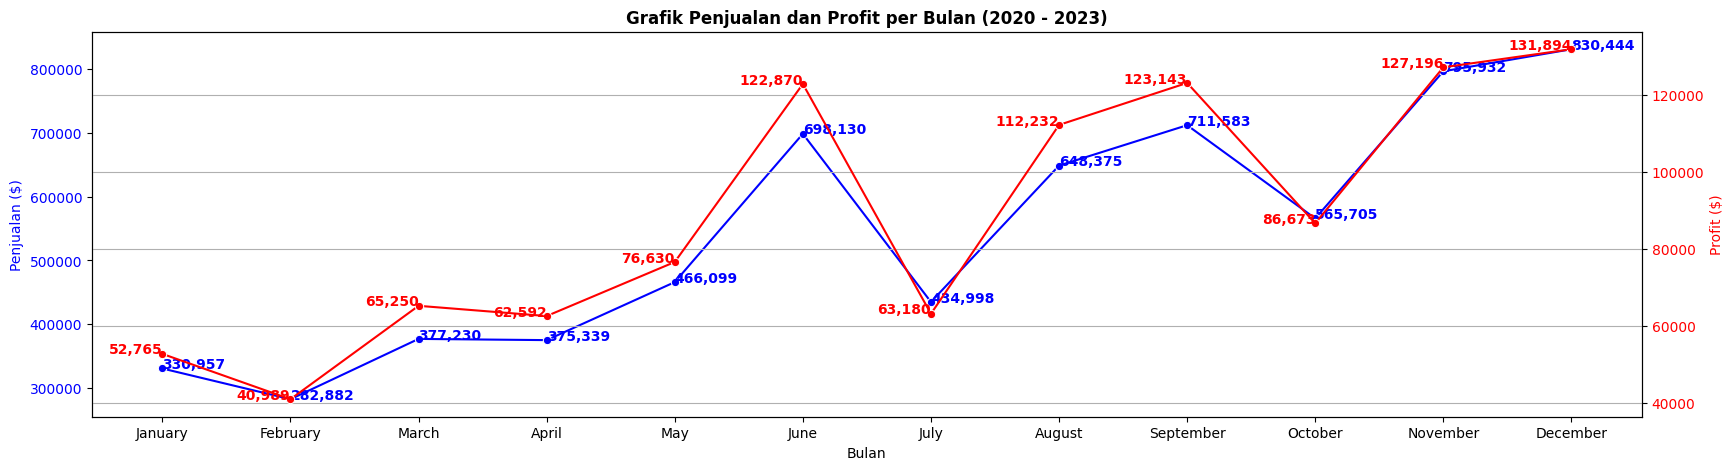

In [24]:
fig, ax1 = plt.subplots(figsize=(20,5))

# Plot garis pertama di ax1
sns.lineplot(x='Bulan', y='total_sales', data=penjualan_bulanan, ax=ax1, color='blue', marker='o', legend=True)
ax1.set_ylabel('Penjualan ($)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

for x, y in zip(penjualan_bulanan['Bulan'], penjualan_bulanan['total_sales']):
    ax1.text(x,y , f'{y:,.0f}', ha='left', fontweight='bold', color='blue')
    
# Membuat twin axis (sumbu Y kedua)
ax2 = ax1.twinx()

# Plot garis kedua di ax2
sns.lineplot(x='Bulan', y='total_profit', data=penjualan_bulanan, ax=ax2, color='red', marker='o')
ax2.set_ylabel('Profit ($)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

for x, y in zip(penjualan_bulanan['Bulan'], penjualan_bulanan['total_profit']):
    ax2.text(x,y , f'{y:,.0f}', ha='right', fontweight='bold', color='red')

ax1.set_xlabel('Bulan')
plt.title('Grafik Penjualan dan Profit per Bulan (2020 - 2023)', fontweight='bold')
plt.grid(True)

plt.show()

Berdasarkan grafik, terlihat pola musiman yang kuat dalam penjualan dan profit produk skincare dan kecantikan. Puncak tertinggi terjadi pada bulan November dan Desember, yang kemungkinan besar dipengaruhi oleh momen belanja akhir tahun seperti Black Friday atau Natal. Sebaliknya, performa paling lemah terjadi di awal tahun, khususnya Februari, saat penjualan dan profit berada pada titik terendah—kemungkinan karena penurunan daya beli pasca libur panjang. Menariknya, pada bulan Juni terjadi peningkatan tajam baik dari sisi penjualan maupun profit, yang mengindikasikan bahwa strategi promosi pada bulan ini tidak hanya efektif dalam mendorong volume penjualan, tetapi juga berhasil menjaga profitabilitas.

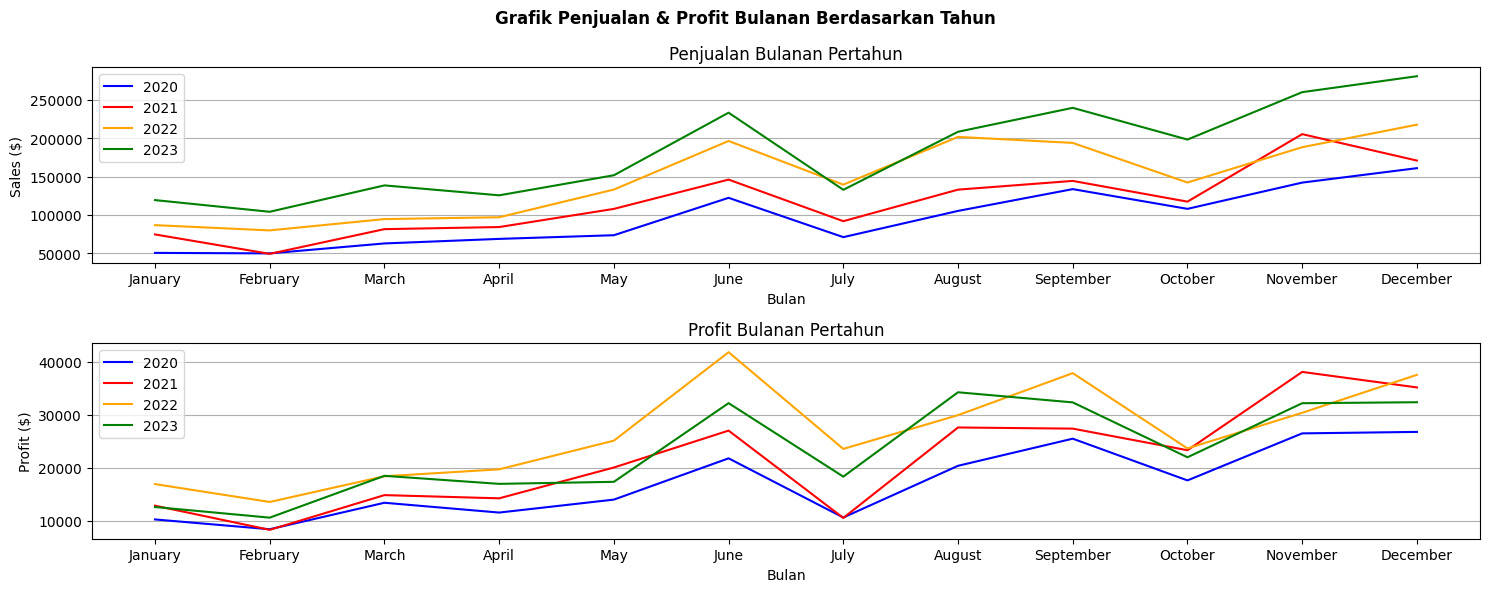

<Figure size 640x480 with 0 Axes>

In [25]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15,6))

sns.lineplot(data=bulanan_pertahun, x='Bulan', y='Sales_2020', ax=ax[0], color='blue', label='2020')
sns.lineplot(data=bulanan_pertahun, x='Bulan', y='Sales_2021', ax=ax[0], color='red', label='2021')
sns.lineplot(data=bulanan_pertahun, x='Bulan', y='Sales_2022', ax=ax[0], color='orange', label='2022')
sns.lineplot(data=bulanan_pertahun, x='Bulan', y='Sales_2023', ax=ax[0], color='green', label='2023')

ax[0].set_title('Penjualan Bulanan Pertahun')
ax[0].set_ylabel('Sales ($)')
ax[0].set_xlabel('Bulan')
ax[0].grid(axis='y')

sns.lineplot(data=bulanan_pertahun, x='Bulan', y='Profit_2020', ax=ax[1], color='blue', label='2020')
sns.lineplot(data=bulanan_pertahun, x='Bulan', y='Profit_2021', ax=ax[1], color='red', label='2021')
sns.lineplot(data=bulanan_pertahun, x='Bulan', y='Profit_2022', ax=ax[1], color='orange', label='2022')
sns.lineplot(data=bulanan_pertahun, x='Bulan', y='Profit_2023', ax=ax[1], color='green', label='2023')

ax[1].set_title('Profit Bulanan Pertahun')
ax[1].set_ylabel('Profit ($)')
ax[1].set_xlabel('Bulan')
ax[1].grid(axis='y')


plt.suptitle('Grafik Penjualan & Profit Bulanan Berdasarkan Tahun', fontweight='bold')
plt.tight_layout()
plt.show()
plt.subplots_adjust(hspace=1)


Grafik di atas menunjukan baik penjualan maupun profit hampir mengalami pergerakan yang seiring pada tiap tahun nya profit terbesar yang pernah dicatatkan adalah pada bulan Juni tahun 2022 walaupun memang dari segi penjualan nya masih dibawah penjualan pada juni tahun 2023. Bulan Desember tahun 2023 mencatatkan penjualan terbesarnya tetapi profit yang dihasilkan masih dibawah dibawah dari 2 tahun berakhir

#### Produk atau kategori apa yang memiliki penjualan paling tinggi?

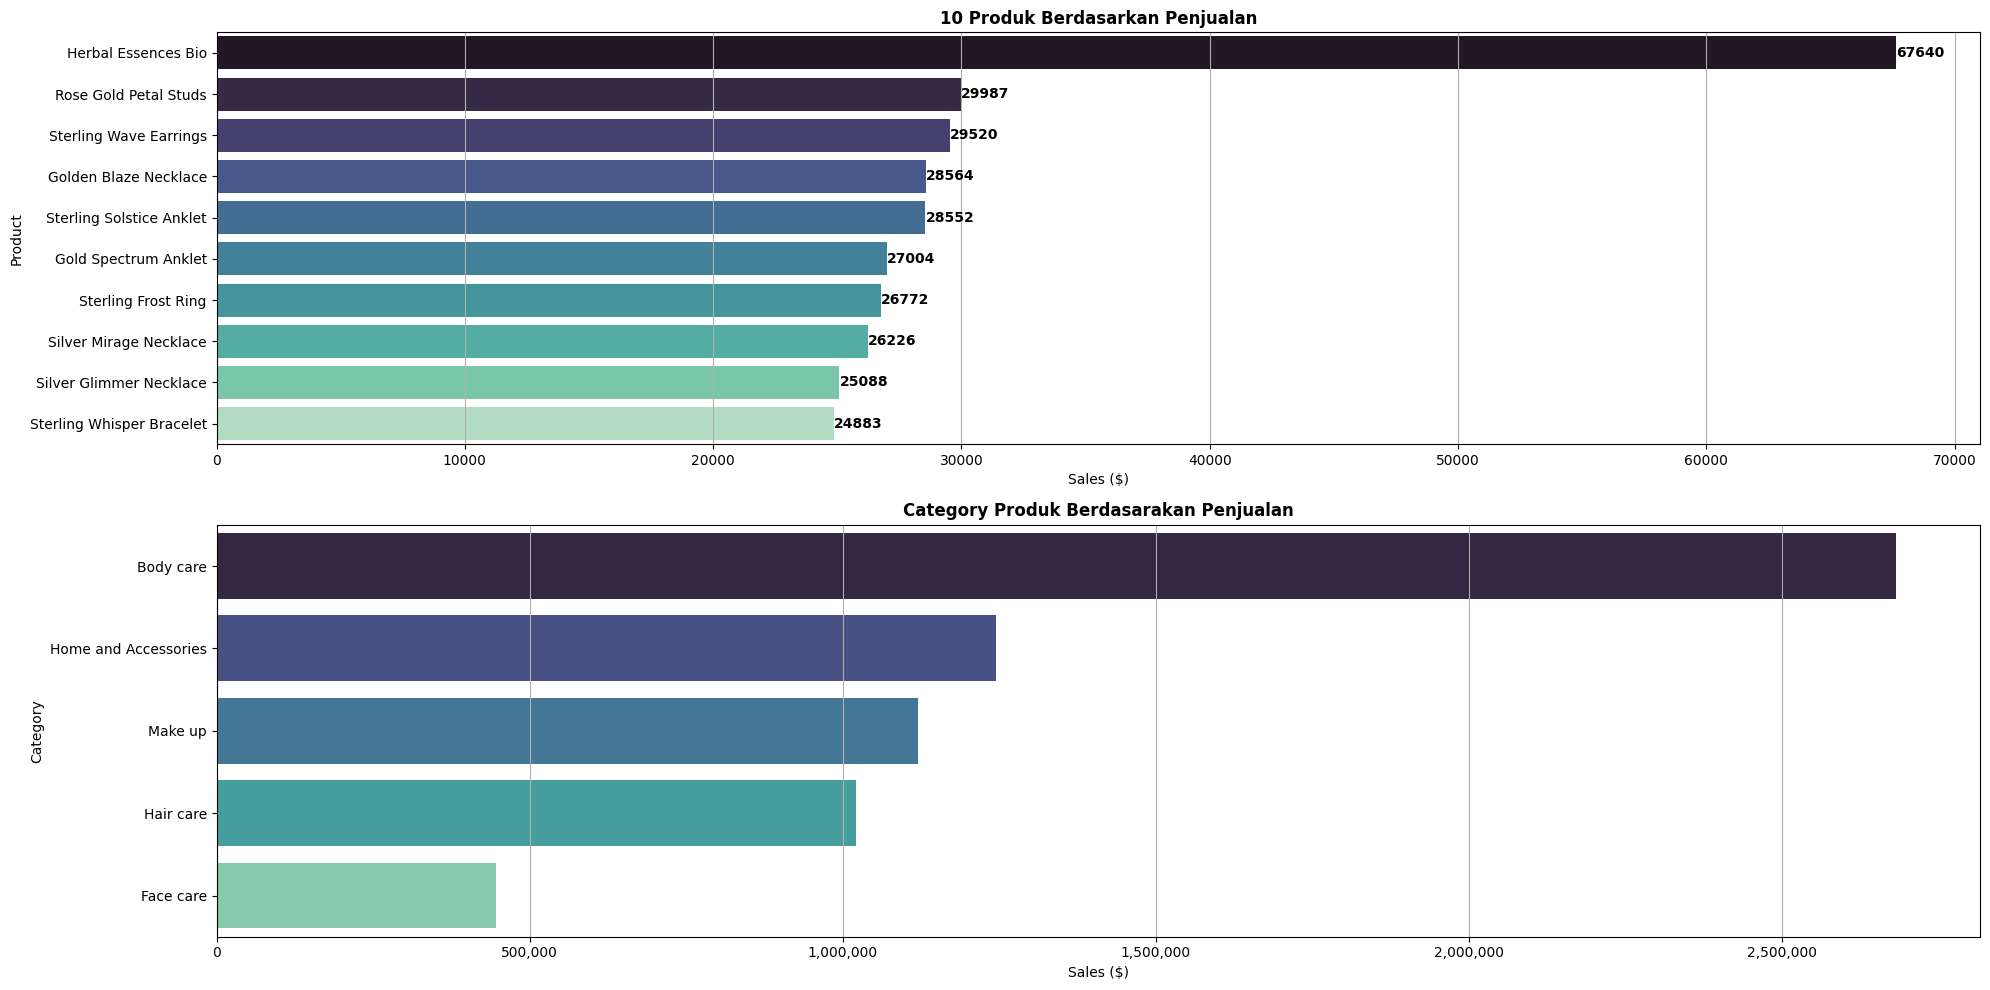

In [34]:
fig, ax = plt.subplots(2,1 ,figsize=(20, 10))

sns.barplot(data=df_product, y='Product', x='Sales', ax=ax[0], palette='mako', hue='Product', legend=False)

for container in ax[0].containers:
    ax[0].bar_label(container, fontweight='bold')
    
ax[0].set_title('10 Produk Berdasarkan Penjualan', fontweight='bold')
ax[0].set_xlabel('Sales ($)')
ax[0].grid(axis='x')

sns.barplot(data=df_cat_product, y='Category', x='Sales', ax=ax[1], palette='mako', hue='Category',legend=False)
ax[1].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x,_: f'{x:,.0f}'))
ax[1].set_title('Category Produk Berdasarakan Penjualan', fontweight='bold')
ax[1].set_xlabel('Sales ($)')
ax[1].grid(axis='x')

plt.tight_layout()
plt.show()

Grafik diatas menunjukan bahwa produk yang menghasilkan penjualan paling tinggi adalah **`Herbal Essences Bio`** dengan nilai penjualan sebesar **`$67.640`** kontribusi dari produk ini sangat jauh dari produk-produk lain entah itu harganya yang murah atau diskon tinggi yang diterapkan pada produk ini. Selain itu produk tersebut juga masuk ke dalam kategori produk **`Body Care`** yang menjadi kategori prdouk paling tinggi juga dalam menghasilkan penjualan yaitu senilai lebih dari **`$2,5 juta`**. Perlu dilihat apakah penjualan dari produk dan kategori produk tersebut sejalan dengan profit yang dihasilkan

#### Produk mana yang paling sering dipesan tetapi memiliki margin keuntungan rendah?

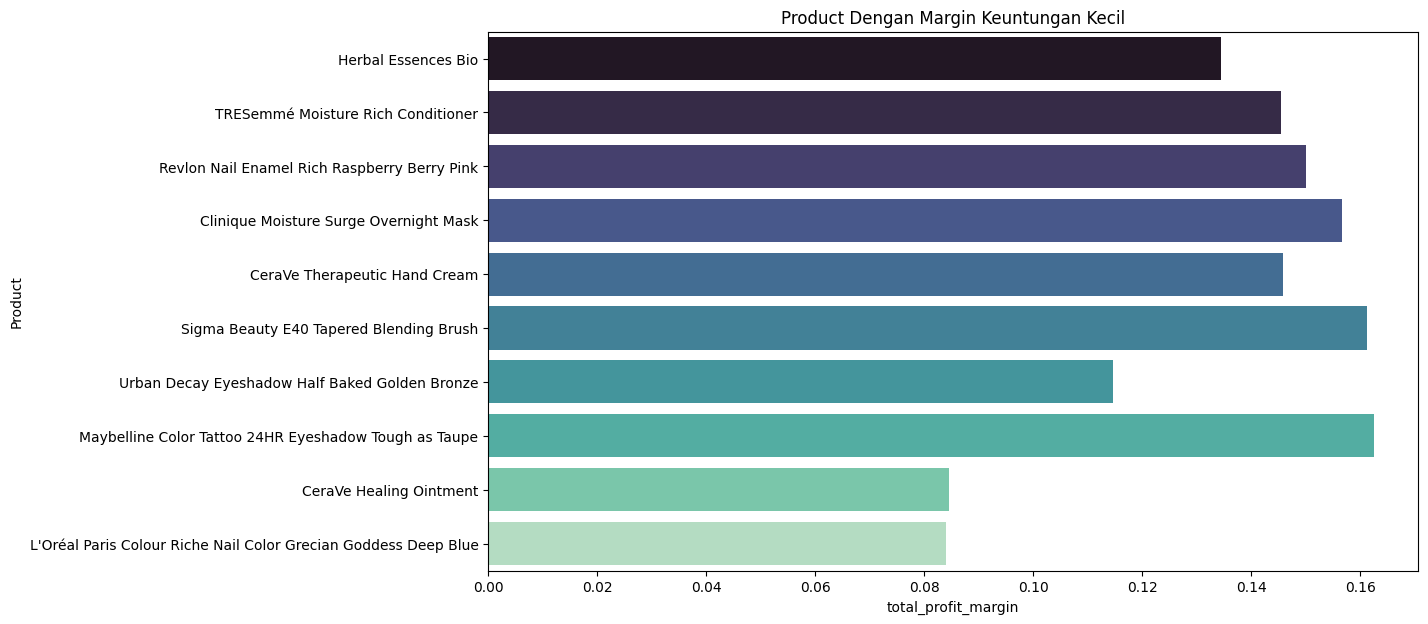

In [27]:
plt.figure(figsize=(12,7))
sns.barplot(data=low_margin_freq_products.head(10), x='total_profit_margin', y='Product', palette='mako', hue='Product', legend=False)
plt.title('Product Dengan Margin Keuntungan Kecil')
plt.show()

Di atas merupakan grafik yang menampilkan produk dengan pembelian terbanyak tetapi tidak sebanding dengan profit margin nya dihasilkan nya , bisa dilihat Walaupun **`Herbal Essences Bio`** menghasilkan penjualan yang tinggi dan juga jumlah pembelian yang banyak, nyatanya profit margin yang dihasilkan masih dibawah produk-produk lain. Hal ini menunjukkan bahwa meskipun produk tersebut populer dan laku keras, kemungkinan besar margin keuntungan per unitnya sangat rendah—baik karena harga pokok penjualan yang tinggi atau strategi diskon yang terlalu agresif.

#### Apakah pelanggan dari segment tertentu memberikan profit yang lebih besar dibandingkan yang lain?

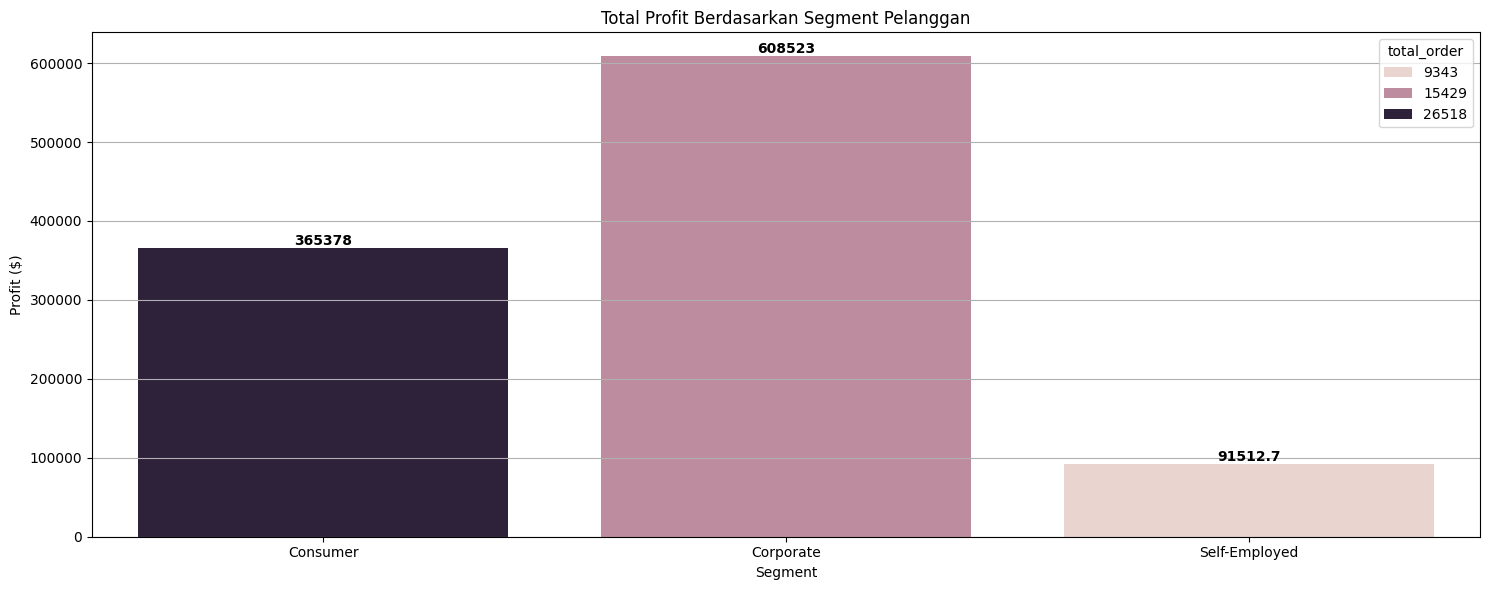

In [28]:
plt.figure(figsize=(15,6))
ax = sns.barplot(data=df_segment, x='Segment', y='total_profit', hue='total_order')
for i in ax.containers:
    ax.bar_label(i, fontweight='bold')
plt.title('Total Profit Berdasarkan Segment Pelanggan')
plt.ylabel('Profit ($)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Berdasarkan grafik "Total Profit Berdasarkan Segment Pelanggan", dapat disimpulkan bahwa pelanggan dari **`segmen Corporate`** memberikan kontribusi profit terbesar dibandingkan dengan segmen lainnya **`Segmen Corporate`** menyumbang total profit tertinggi yaitu **`$608.523`**, meskipun jumlah ordernya **`(15.429)`** lebih sedikit dibanding segmen Consumer **`(26.518 order)`**. Ini mengindikasikan bahwa pelanggan Corporate cenderung melakukan pembelian dengan nilai lebih tinggi atau profit margin per transaksi yang lebih besar. **`Segmen Consumer`**, meski memiliki jumlah pesanan terbanyak, hanya menghasilkan **``$365.378 profit``**, yang menunjukkan bahwa meskipun volume tinggi, margin per transaksi mungkin lebih rendah. **``Segmen Self-Employed``** merupakan segmen dengan kontribusi profit paling kecil, hanya **`$91.512,7`** dengan jumlah order juga paling sedikit **`(9.343 order)`**, menjadikannya segmen dengan kontribusi paling minim terhadap profit keseluruhan.

#### Apa dampak pemberian diskon terhadap profit?

Text(0.5, 1.0, 'Discount Vs Profit')

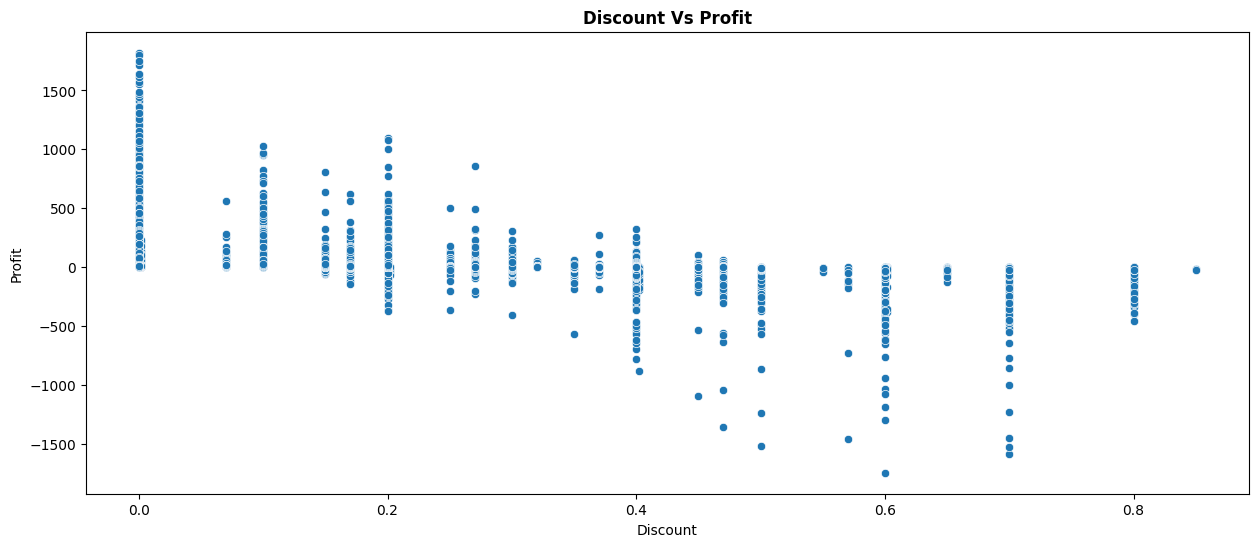

In [29]:
plt.figure(figsize=(15,6))
sns.scatterplot(data=df, y='Profit', x='Discount')
plt.title('Discount Vs Profit', fontweight='bold')

Berdasarkan Scatterplot diatas terlihat bahwa adanya hubungan negatif antara Pemberian Diskon dengan Profit yang dihasilkan walaupun memang tidak terlalu terlihat, namun jika dilihat ketika diskon diberikan antara **`0% - 20% profit yang dihasilkan masih berada di angka positif`** berbeda dengan ketika diskon diberikan dari rentang **`40% - 80% profit mengalami penurunan bahkan menyentuh angka negatif atau bisa dikatakn rugi`** hal tersebut menunjukan bahwa dampak pemberian diskon secara besar besaran akan memepengaruhi profit yang dihasilkan. namun penurunan profit tersebut perlu dilihat dari sudut pandang lain misalkan performa produk atau daya beli dari pelanggan.

#### Apakah ada korelasi negatif antara diskon tinggi dengan penurunan profit?

<Axes: >

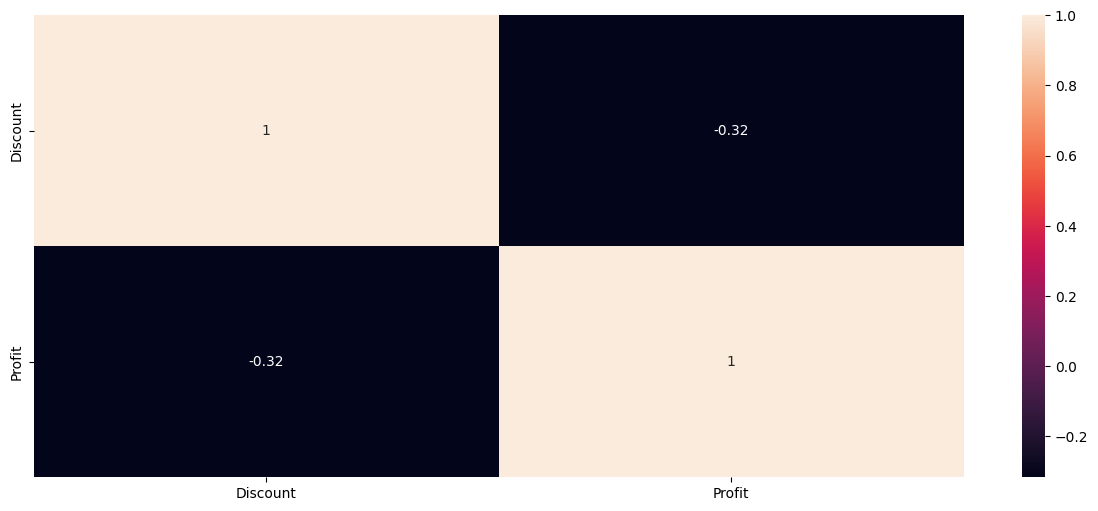

In [30]:
plt.figure(figsize=(15,6))
corr = df[['Discount', 'Profit']].corr()
sns.heatmap(corr, annot=True)

Berdasarkan heatmap di atas warna dari bidak kotak berwaran hitam pekat menunjukan angka **`-0.32`**.hal itu menunjukan adanya korelasi negatif dari Discount dan Profit tetapi masi dalam kategori sedang.

#### Bagaimana distribusi penjualan berdasarkan negara, region atau market?

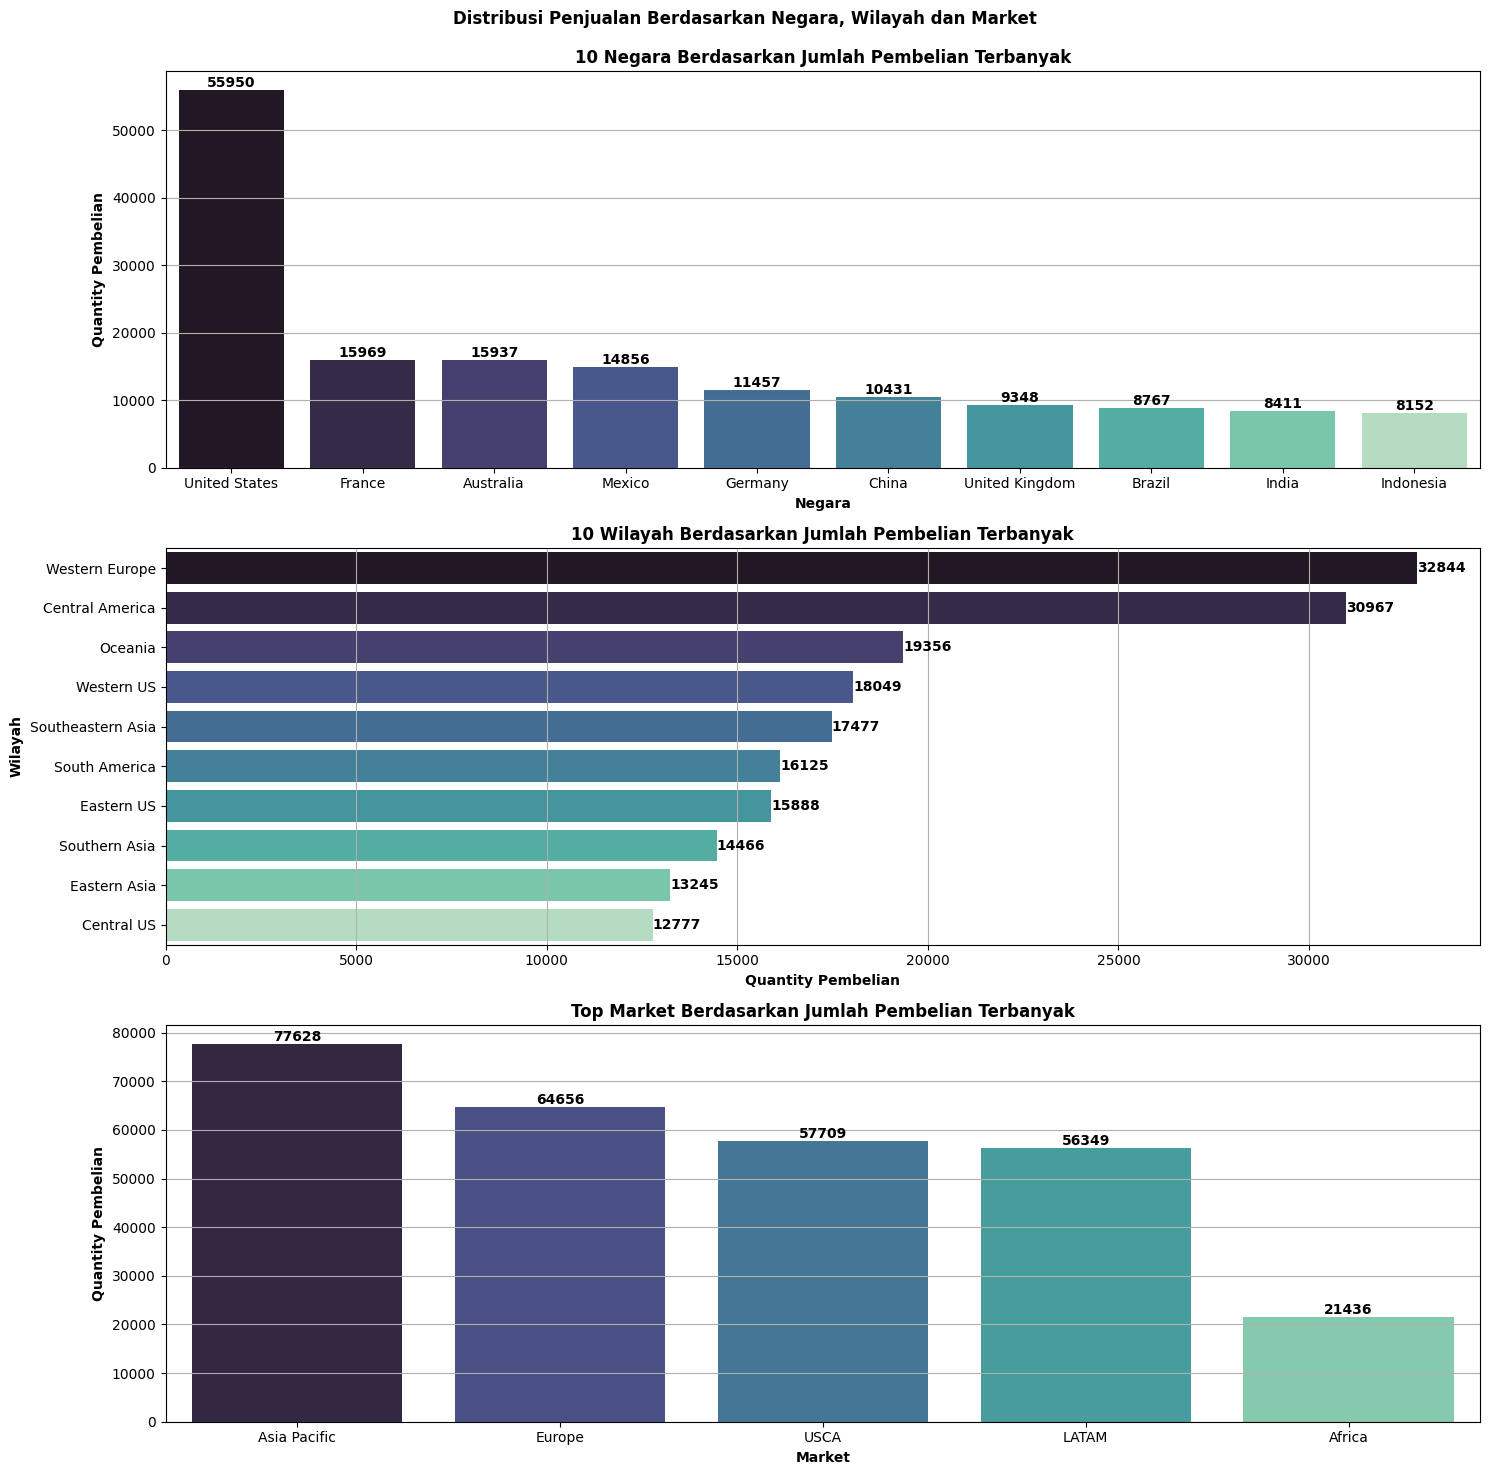

In [31]:
fig, ax = plt.subplots(3,1, figsize=(15,15))

# Country
sns.barplot(data=sales_distribution(df, 'Country').head(10), x='Country', y='Quantity',ax=ax[0], palette='mako', hue='Country', legend=False)
for i in ax[0].containers:
    ax[0].bar_label(i, fontweight='bold')
    
ax[0].set_title('10 Negara Berdasarkan Jumlah Pembelian Terbanyak', fontweight='bold')
ax[0].set_xlabel('Negara', fontweight='bold')
ax[0].set_ylabel('Quantity Pembelian', fontweight='bold')
ax[0].grid(axis='y')


# Region
sns.barplot(data=sales_distribution(df, 'Region').head(10), y='Region', x='Quantity', ax=ax[1], palette='mako', hue='Region', legend=False)
for i in ax[1].containers:
    ax[1].bar_label(i, fontweight='bold')

ax[1].set_title('10 Wilayah Berdasarkan Jumlah Pembelian Terbanyak', fontweight='bold')
ax[1].set_xlabel('Quantity Pembelian', fontweight='bold')
ax[1].set_ylabel('Wilayah', fontweight='bold')
ax[1].grid(axis='x')

# Market
sns.barplot(data=sales_distribution(df, 'Market'),x='Market', y='Quantity' ,ax=ax[2], palette='mako', hue='Market',legend=False)
for i in ax[2].containers:
    ax[2].bar_label(i, fontweight='bold')

ax[2].set_title('Top Market Berdasarkan Jumlah Pembelian Terbanyak', fontweight='bold')
ax[2].set_ylabel('Quantity Pembelian', fontweight='bold')
ax[2].set_xlabel('Market', fontweight='bold')
ax[2].grid(axis='y')

plt.suptitle('Distribusi Penjualan Berdasarkan Negara, Wilayah dan Market\n', fontweight='bold')
plt.tight_layout()
plt.show()

**`Amerika Serikat`** secara signifikan mendominasi jumlah pembelian dengan total **`55.950 unit`**, jauh melampaui negara lain seperti **`Prancis (15.969)`** dan **`Australia (15.937)`**. Negara-negara lain seperti **`Meksiko`**, **`Jerman`**, dan **`Cina`** memiliki angka pembelian yang lebih rendah, sementara **`Indonesia`** berada di posisi ke-10 dengan **`8.152`** pembelian. Hal ini menandakan bahwa **`Amerika Serikat`** merupakan pasar paling potensial jika dilihat dari jumlah transaksi yang terjadi.

`Western Europe` dan `Central America` menjadi dua wilayah dengan jumlah pembelian `tertinggi`, masing-masing sebesar `32.844` dan `30.967` unit. Wilayah lain seperti `Oceania`, `Western US`, dan `Southeastern Asia` juga menunjukkan kontribusi yang cukup besar terhadap total pembelian. Sementara itu, wilayah seperti `Central US` dan `Eastern Asia` memiliki jumlah pembelian yang lebih rendah. Distribusi ini menunjukkan bahwa strategi pemasaran yang difokuskan pada wilayah Eropa Barat dan Amerika Tengah bisa menjadi langkah yang tepat untuk meningkatkan penjualan.

Dalam kategori market, `Asia Pacific` menduduki peringkat pertama dengan jumlah pembelian tertinggi yaitu `77.628 unit`, diikuti oleh `Europe` `(64.656)` dan `USCA` `(57.709)`. `LATAM` juga menunjukkan performa yang kuat dengan `56.349` pembelian, sedangkan `Africa` `tertinggal` `jauh` di angka `21.436`. Data ini mengindikasikan bahwa `Asia Pacifi` merupakan pasar utama yang paling menjanjikan secara keseluruhan, meskipun market Eropa dan Amerika Utara juga tetap penting untuk dipertahankan.

#### Wilayah mana yang memiliki potensi pasar terbesar untuk dikembangkan?

In [32]:
potential_region

,Region,Order_Date,Sales,Profit,Order_ID,profit_margin,sales_growth,order_growth
11,Central Africa,2023,25015,7137.050,117,0.285311,0.607854,0.392857
71,Southern Europe,2023,109219,21125.250,381,0.193421,0.547537,0.346290
35,Eastern Europe,2023,63881,17533.450,290,0.274470,0.468799,0.387560
3,Canada,2023,15745,4346.800,62,0.276075,0.193074,0.068966
91,Western US,2023,146856,25410.950,541,0.173033,0.189609,0.291169
67,Southern Asia,2023,103939,22283.600,461,0.214391,0.186762,0.259563
39,Eastern US,2023,119000,16243.050,471,0.136496,0.167651,0.262735
43,North Africa,2023,43042,12520.350,236,0.290887,0.164336,0.296703
15,Central America,2023,235423,36703.218,923,0.155903,0.157330,0.139506
7,Caribbean,2023,68279,9810.696,272,0.143685,0.041648,0.062500


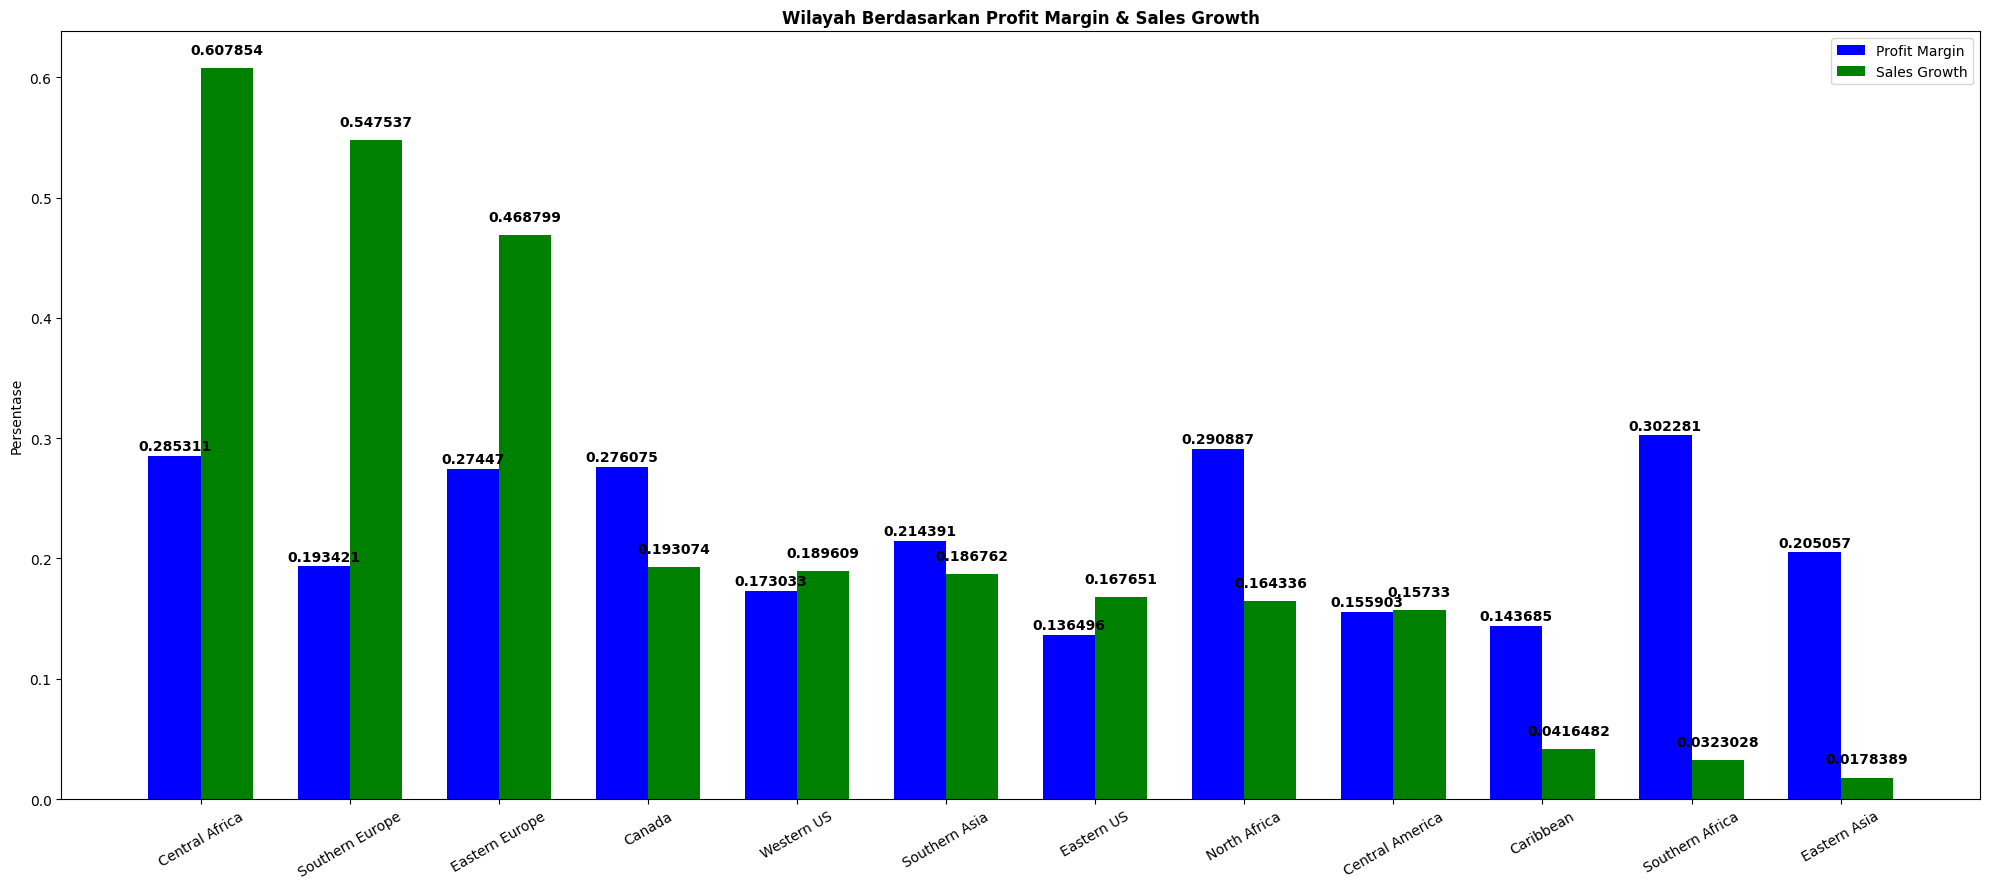

In [36]:
# wilayah potensial
labels = potential_region['Region']
profit_margin = potential_region['profit_margin']
sales_growth = potential_region['sales_growth']

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(20,9))
rects1 = ax.bar(x - width/2, profit_margin, width, label='Profit Margin', color='blue')
rects2 = ax.bar(x + width/2, sales_growth, width, label='Sales Growth', color='green')

ax.set_title('Wilayah Berdasarkan Profit Margin & Sales Growth', fontweight='bold')
ax.set_ylabel('Persentase')
ax.set_xticks(x, labels, rotation=30)
ax.legend()

ax.bar_label(rects1, padding=2, fontweight='bold')
ax.bar_label(rects2, padding=8, fontweight='bold')

plt.tight_layout()
plt.show()

Walaupun dari segi total penjualan belum tinggi dan total pembelian masih dibawah wilayah lain Central Africa adalah wilyah yang memiliki potensi untuk dikembangkan. hal itu berdasarkan dari pertumbuhan penjualan yang cukup besar dibandingkan wilayah lain yaitu sebesar 60%, juga disamping itu profit margin yang cukup lumayan yaitu sebesar 28% yang menunjukan masih menguntungkan. Hal trsebut mendasari bahwa wilayah tersebut memilki potensi pasar yang perlu dikembangkan agar mendapat keuntungan yang maksimal.

## Insight & Recomendation


1. **Tren Penjualan Tahunan**

    Penjualan menunjukkan peningkatan konsisten dari 2020 hingga 2023, mencapai **`$2.192.647`** di tahun terakhir, menandakan pertumbuhan bisnis yang baik. Namun, profit
    mengalami penurunan di tahun 2023 setelah kenaikan selama dua tahun sebelumnya. Pola musiman yang kuat terlihat, dengan puncak penjualan di November-Desember dan titik
    terendah di Februari.

    **Rekomendasi:**
   
    Analisis mendalam diperlukan untuk mengidentifikasi penyebab **penurunan profit di 2023**, termasuk dampak diskon dan performa produk. Optimalkan promosi di **Q4 (Oktober
    Desember)** dengan **bundling dan kampanye digital**, serta dorong penjualan di awal tahun **(Januari-Februari)** dengan program loyalitas atau peluncuran produk baru.

2. **Analisis Produk dan Kategori**

    Produk **Herbal Essences Bio** mencatat penjualan tertinggi **`$67.640`**, dan termasuk dalam kategori **Body Care** yang dominan **`>$2.5 juta`**. Namun, penjualan tinggi ini
    tidak sebanding dengan profit margin yang dihasilkan, mengindikasikan margin keuntungan per unit yang rendah.

    **Rekomendasi:**
   
    Evaluasi struktur biaya dan strategi diskon untuk **Herbal Essences Bio** guna meningkatkan profitabilitas. Pertimbangkan untuk fokus pada produk dengan margin lebih tinggi
    dalam kategori **Body Care** atau menyesuaikan harga **Herbal Essences Bio**.

3. **Segmentasi Pelanggan**

    Segmen **Corporate** memberikan kontribusi profit terbesar **(608.523)** meskipun jumlah order **(15.429)** lebih sedikit dari segmen **Consumer" (26.518 order)**. Segmen
    **Consumer** menghasilkan profit **`$365.378`**, sementara **Self-Employed** memberikan kontribusi profit terendah **`($91.512,7` dengan 9.343 order)**.

    **Rekomendasi:**

    Kembangkan strategi khusus untuk mempertahankan dan meningkatkan penjualan ke segmen **Corporate**, seperti program loyalitas atau diskon volume. Evaluasi strategi untuk
    meningkatkan profitabilitas dari segmen **Consumer** dan **Self-Employed**.
   
4. **Dampak Diskon terhadap Profit**

    Terdapat hubungan negatif antara pemberian diskon dan profit yang dihasilkan. Diskon antara **0%-20%** menghasilkan profit positif, sementara diskon **40%-80%** menyebabkan
    penurunan profit signifikan, bahkan kerugian.

    **Rekomendasi:**

    Tinjau kembali strategi diskon secara keseluruhan dan batasi diskon besar-besaran yang dapat merugikan profitabilitas. Pertimbangkan alternatif promosi yang tidak terlalu
    bergantung pada diskon, seperti bundling atau hadiah dengan pembelian.

5. **Analisis Geografis**

    Amerika Serikat mendominasi jumlah pembelian **(55.950 unit)**, jauh melampaui negara lain seperti Prancis **(15.969)** dan Australia **(15.937)**. **Asia Pacific** adalah
    market terbesar **(77.628 unit)**, diikuti oleh **Eropa (64.656) dan USCA (57.709)**.

    **Rekomendasi:**

    Fokuskan upaya pemasaran di **Amerika Serikat** dan **wilayah Asia Pacific** untuk memaksimalkan penjualan. Pertimbangkan untuk menyesuaikan strategi pemasaran di negara-negara
    dengan penjualan lebih rendah untuk meningkatkan penetrasi pasar.
   
6. **Potensi Pasar Afrika Tengah**

    Meskipun total penjualan dan pembelian masih rendah, **Afrika Tengah** menunjukkan pertumbuhan penjualan yang signifikan **(60%)** dan profit margin yang lumayan **(28%)**.
    Ini menandakan potensi pasar yang perlu dikembangkan.

    **Rekomendasi:**
   
    Investasikan dalam riset pasar dan strategi pemasaran yang disesuaikan untuk Afrika Tengah guna memanfaatkan potensi pertumbuhan. Pertimbangkan untuk menjalin kemitraan lokal
    untuk mempercepat penetrasi pasar.
